## Libraries & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# sns.set_style('whitegrid')
# sns.set_style('darkgrid')
sns.set_theme()
sns.set_context('notebook')

np.set_printoptions(precision=2, suppress=True)

In [2]:
original_df = pd.read_csv('data/data.csv')
df = original_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          319 non-null    object 
 1   year          319 non-null    int64  
 2   status        319 non-null    object 
 3   type          319 non-null    object 
 4   country       309 non-null    object 
 5   genres        319 non-null    object 
 6   rating        65 non-null     float64
 7   watched_date  65 non-null     object 
 8   note          121 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 22.6+ KB


In [3]:
rows = df.shape[0]

## Preprocessing

In [4]:
df['rating'] = df['rating'].astype('Int64')

In [5]:
df['watched_date'] = df['watched_date'].apply(lambda d: d[:4] if pd.notna(d) else d)
watched_year = df['watched_date'].value_counts(ascending=True, dropna=True)
watched_year

watched_date
2023     9
2024    27
2025    29
Name: count, dtype: int64

## Visualization

In [6]:
movie_settings = {'label': 'movie'}
series_settings = {'label': 'series'}

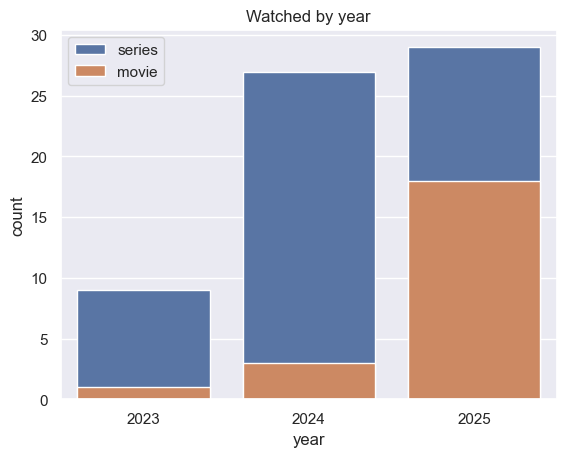

In [7]:
sns.barplot(watched_year, **series_settings)
sns.barplot(df['watched_date'].where(df['type'] == 'movie').value_counts(), **movie_settings)

plt.xlabel('year')
plt.title('Watched by year')
plt.legend(loc='upper left')
plt.show()

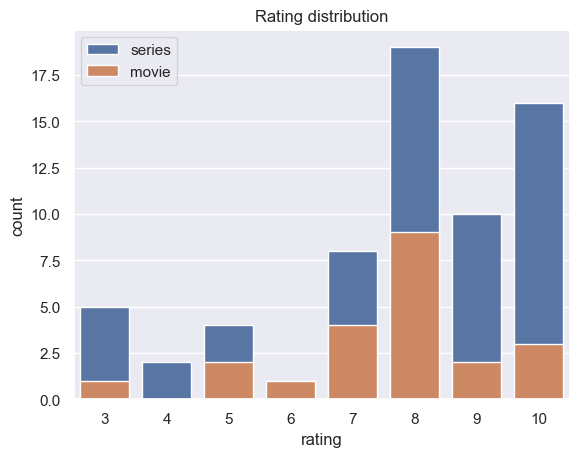

In [8]:
sns.barplot(df['rating'].value_counts(), **series_settings)
sns.barplot(df['rating'].where(df['type'] == 'movie').value_counts(), **movie_settings)
plt.title('Rating distribution')
plt.legend(loc='upper left')
plt.show()

In [9]:
# sns.countplot(df, x='rating', hue='type')
# plt.title('Rating distribution')
# plt.show()

### Country

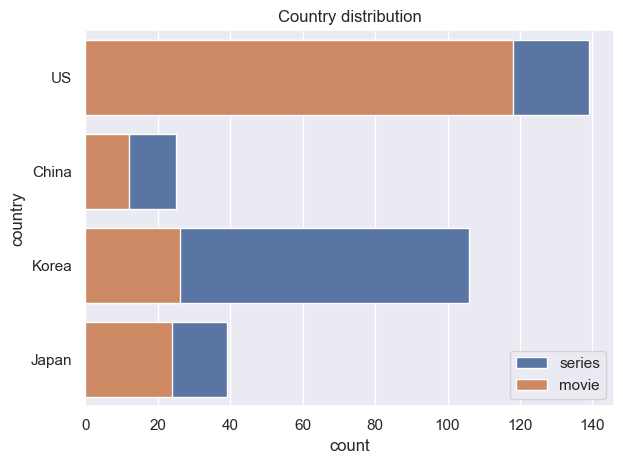

In [10]:
sns.countplot(df['country'], **series_settings)
sns.countplot(df['country'].where(df['type'] == 'movie'), **movie_settings)
plt.legend()
plt.title('Country distribution')
plt.tight_layout()
plt.show()

#### Watched country

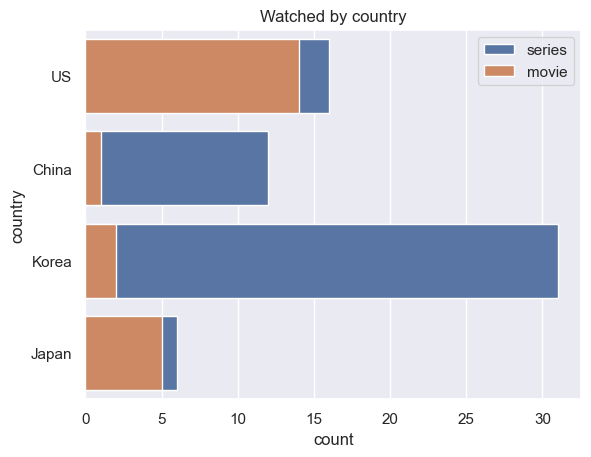

In [11]:
watched_country = df['country'].where((df['status'] == 'completed') | (df['status'] == 'dropped'))
sns.countplot(watched_country, **series_settings)
sns.countplot(watched_country.where(df['type'] == 'movie'), **movie_settings)
plt.legend()
plt.title('Watched by country')
plt.show()

### Type

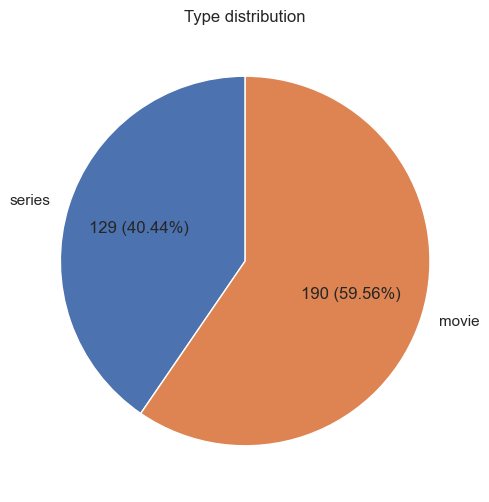

In [12]:
type_count = df['type'].value_counts().sort_index(ascending=False)
plt.figure(figsize=(6,6))
plt.pie(
    type_count, 
    labels=type_count.keys(),
    autopct=lambda p: f'{int(p / 100 * rows)} ({p:.2f}%)',
    startangle=90,
    # counterclock=False,
)
plt.title('Type distribution')
plt.show()

### Status

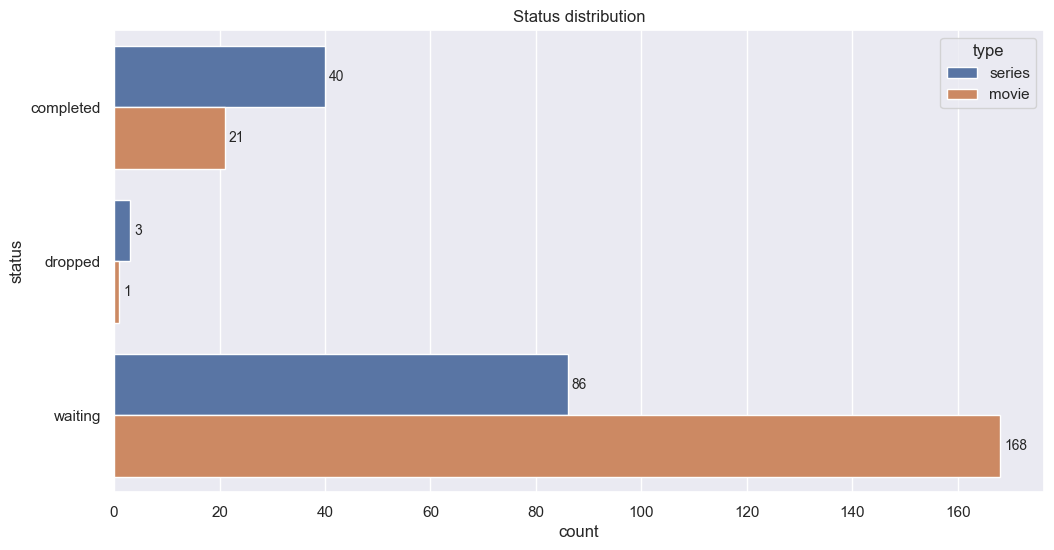

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(df, y='status', hue='type')
plt.title('Status distribution')
ax = plt.gca()
ax.bar_label(ax.containers[0], fontsize=10, padding=3)
ax.bar_label(ax.containers[1], fontsize=10, padding=3)
plt.show()

### Release year distribution

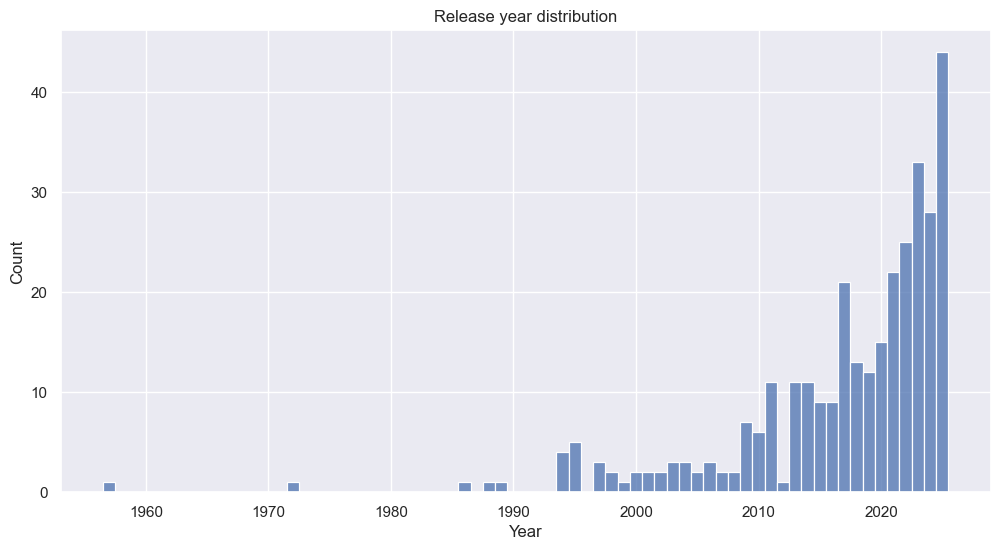

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df['year'], discrete=True)
plt.xlabel('Year')
plt.title('Release year distribution')
# plt.xlim(1980, np.max(df['year']) + 1)
plt.show()

### Genres

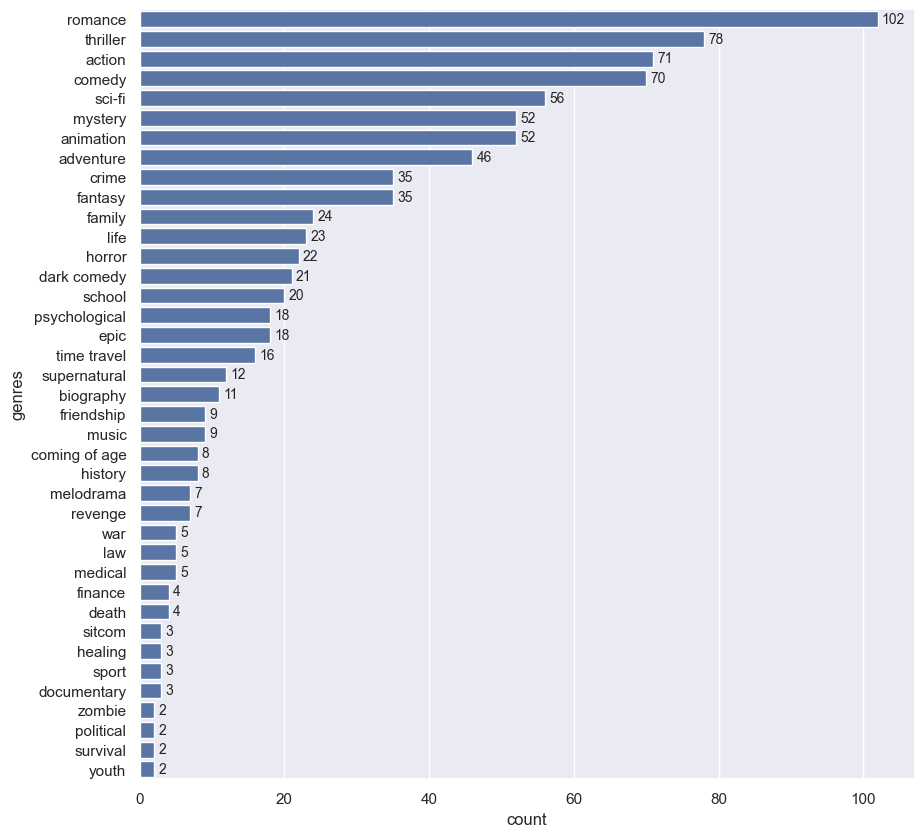

In [15]:
genres = df['genres'].str.split(',').explode().value_counts()

plt.figure(figsize=(10, 10))
sns.barplot(genres, orient='h')
ax = plt.gca()
ax.bar_label(ax.containers[0], fontsize=10, padding=3)
plt.show()